<h3>Guided Acivity 4.2 Scara with Prismatic Manipulator</h3>

In this Jupyter Notebook we are going to model a Scara Robot with a Prismatic Manipulator and as a final exercise you are going to make a connection to the Coppelia (this part is what we have done in class in guided activity 4.1)

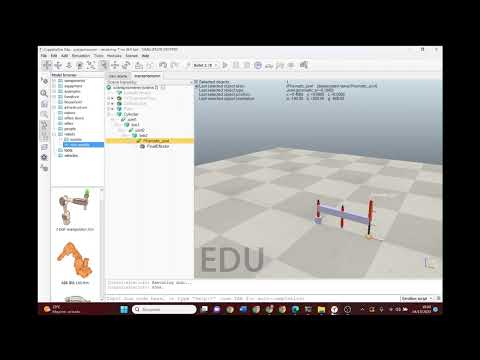

In [1]:
# You have a Guided Video to help you perform exercise 4.1

from IPython.display import YouTubeVideo

YouTubeVideo('uTJgaM2UJSY') 

The image in the figure represents a SCARA robot studied in class and its D-H table.<br>
<img src="scara.jpg" width="500"><br>
From the parameters indicated in the image, we calculate the coordinate transformation matrices for each joint.

In [2]:
# We import the libraries necessary to work
import numpy as np
import sympy as sp
from sympy import *

In [3]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [4]:
# we declare the symbols (lengths, variables, etc.) that will be used for a later formulation.

from sympy.physics.mechanics import dynamicsymbols
theta1, theta2, d3, lc, la, lb, theta, alpha, a, d = dynamicsymbols('theta1 theta2 d3 lc la lb theta alpha a d')
theta1, theta2, d3, lc, la, lb, theta, alpha, a, d 

(theta1, theta2, d3, lc, la, lb, theta, alpha, a, d)

In [5]:
# The standard homogeneous transformation matrix is represented as:

rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

In [6]:
# Transformation: 1st axis from '0' to '1'
m01 = m.subs({ theta:theta1, d:lc, a:la , alpha:0})
m01

Matrix([
[cos(theta1), -sin(theta1), 0, la*cos(theta1)],
[sin(theta1),  cos(theta1), 0, la*sin(theta1)],
[          0,            0, 1,             lc],
[          0,            0, 0,              1]])

In [7]:
# Transformation: 2nd axis from '1' to '2'
# The 180° of Alpha must be converted to radians
# problem with rounding to 0  http://research.iac.es/sieinvens/python-course/source/sympy.html
m12  = m.subs({ theta:theta2, d:0,a:lb ,alpha:180*np.pi/180})
N(m12,2)

Matrix([
[cos(theta2),  1.0*sin(theta2),  1.2e-16*sin(theta2), lb*cos(theta2)],
[sin(theta2), -1.0*cos(theta2), -1.2e-16*cos(theta2), lb*sin(theta2)],
[          0,          1.2e-16,                 -1.0,              0],
[          0,                0,                    0,            1.0]])

In [8]:
# We solve Sympy's problem of rounding to 0 by directly assigning the value
m12[0,2]=0
m12[1,2]=0
m12[2,1]=0  #remember the problem when rounding to 0 http://research.iac.es/sieinvens/python-course/source/sympy.html
m12

Matrix([
[cos(theta2),  1.0*sin(theta2),    0, lb*cos(theta2)],
[sin(theta2), -1.0*cos(theta2),    0, lb*sin(theta2)],
[          0,                0, -1.0,              0],
[          0,                0,    0,              1]])

In [9]:
# Transformation: 3rd axis from '2' to '3'
m23 = m.subs({ theta:0, d:d3, a:0 ,alpha:0})
m23

Matrix([
[1, 0, 0,  0],
[0, 1, 0,  0],
[0, 0, 1, d3],
[0, 0, 0,  1]])

In [10]:
# Transformed Matrix of the Robot without simplifying
m03 = (m01*m12*m23)
m03

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 1.0*sin(theta1)*cos(theta2) + 1.0*sin(theta2)*cos(theta1),    0, la*cos(theta1) - lb*sin(theta1)*sin(theta2) + lb*cos(theta1)*cos(theta2)],
[ sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), 1.0*sin(theta1)*sin(theta2) - 1.0*cos(theta1)*cos(theta2),    0, la*sin(theta1) + lb*sin(theta1)*cos(theta2) + lb*sin(theta2)*cos(theta1)],
[                                                 0,                                                         0, -1.0,                                                             -1.0*d3 + lc],
[                                                 0,                                                         0,    0,                                                                        1]])

The result is the same given in theory:<br>
<img src="mbeescara.jpg" width="500"><br>

In [11]:
# We can simplify it more:
mbee= sp.Matrix([[sp.trigsimp(m03[0,0].simplify()), sp.trigsimp(m03[0,1].simplify()), sp.trigsimp(m03[0,2].simplify()),sp.trigsimp(m03[0,3].simplify())],
                 [sp.trigsimp(m03[1,0].simplify()), sp.trigsimp(m03[1,1].simplify()), sp.trigsimp(m03[1,2].simplify()),sp.trigsimp(m03[1,3].simplify())],
                 [m03[2,0].simplify(), m03[2,1].simplify(), m03[2,2].simplify(),m03[2,3].simplify()],
                 [m03[3,0].simplify(), m03[3,1].simplify(), m03[3,2].simplify(),m03[3,3].simplify()]])

mbee
    

Matrix([
[cos(theta1 + theta2),  1.0*sin(theta1 + theta2),    0, la*cos(theta1) + lb*cos(theta1 + theta2)],
[sin(theta1 + theta2), -1.0*cos(theta1 + theta2),    0, la*sin(theta1) + lb*sin(theta1 + theta2)],
[                   0,                         0, -1.0,                             -1.0*d3 + lc],
[                   0,                         0,    0,                                        1]])

##  Checking that the values   (Forward Kinematics)

In [12]:
# We can check if it works by substituting some parameters to the robot values in Coppelia :
# The lengths of the robot made in copelia are la:0.2,lb:0.2,   lc:0.1 (height of Robot)
# Si por ejemplo ponemos que Theta1 son 0grados y Theta2 son 90grados y la d3 son 0.05
mbee = mbee.subs({ theta1:0*np.pi/180, theta2:90*np.pi/180, la:0.2,lb:0.2,lc:0.1,d3:0.05})
N(mbee,4)
# Nos ha de dar la posición del manipulador a (0.2,0.2,0.05) 

Matrix([
[6.123e-17,        1.0,    0,  0.2],
[      1.0, -6.123e-17,    0,  0.2],
[        0,          0, -1.0, 0.05],
[        0,          0,    0,  1.0]])

## Now we are going to determine the Robot Work AREA, we will use the Plotly library.
### This representation must be done in layers, initially we will assume the position of d3=0.1, thus we will draw the layer Z=0 and then d3=0 representing the layer Z=0.1


In [13]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use
import plotly.graph_objs as go
from numpy import * 
from plotly.subplots import make_subplots

la, lb, lc = 0.2,0.2,0.1  # arm length and height values
theta1, theta2 = np.mgrid[-np.pi/2:np.pi/2:100j, -np.pi/2:np.pi/2:100j] # motors that can move from -90 to 90º

x = la*cos(theta1) + lb*cos(theta1 + theta2)
y = la*sin(theta1) + lb*sin(theta1 + theta2)
z = y*0   # The initial area represented is in the layer Z=0 d3=0.1 --> Z=0.1-d3=0

fig = make_subplots(rows=1, cols=1,
                    specs=[[{'is_3d': True}]],
                    subplot_titles=['WORK AREA FOR LAYERS d3=0.1 and d3=0'],
                    )

fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07))
# The final area represented is in layer Z=0.1,d3=0 Z=0.1-d3=0.1
fig.add_trace(go.Surface(x=x, y=y, z=z+0.1, colorbar_x=-0.07)) 
fig.update_layout(title_text="SCARA WITH PRISMATIC MANIPULATOR")
fig.show()

##  Final exercise you are going to make a connection to the Coppelia using the API SIM (this part is what we have done in class in guided activity 4.1).




### Import libraries

In [15]:
import sim
import numpy as np

----------------------------------------------------
The remoteApi library could not be loaded. Make sure
it is located in the same folder as "sim.py", or
appropriately adjust the file "sim.py"
----------------------------------------------------



AttributeError: 'NoneType' object has no attribute '_handle'

### 1. Establish the connection

In [ ]:
def connect(port):
# Establishes the connection to COPPELIA
# The port must match the connection port in COPPELIA -- PRESS PLAY in Coppelia Scene!!!
# returns the client number or -1 if the connection cannot be established
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("connect to ", port)
    else: print("Can not connect ")
    return clientID

<h3> 2. Get the handlers </h3>

<h3> 3. What is the position of the joints?</h3>

<h3> 4. We move the robot  p.e. theta1=45  theta2=45 d3=0.07 </h3>